In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar10_vgg_model/'

In [106]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [107]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [108]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [109]:
validation_df

,step,error,accuracy
0.0000,0.0000,8.142068,0.107656
0.1792,0.1792,7.107263,0.363750
0.3840,0.3840,6.513081,0.398750
0.6144,0.6144,6.060764,0.443906
0.8192,0.8192,5.517888,0.464375
1.2288,1.2288,4.642281,0.544844
1.4336,1.4336,4.403293,0.511563
1.6384,1.6384,3.994392,0.575781
1.8176,1.8176,3.667999,0.608281
2.0224,2.0224,3.408091,0.621875


In [110]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [111]:
plot_data = plot_df.as_matrix().transpose()

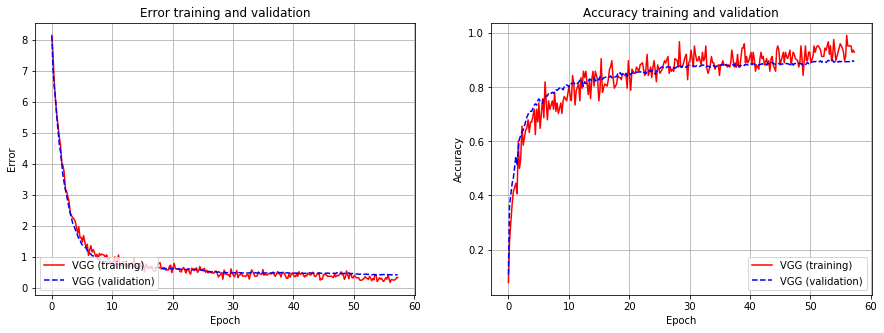

In [112]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'r-', label='VGG (training)')
plt.plot(plot_data[0], plot_data[3], 'b--', label='VGG (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'r-', label='VGG (training)')
plt.plot(plot_data[0], plot_data[4], 'b--', label='VGG (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

#plt.savefig('activation_functions.pdf', bbox_inches='tight')
plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar100_vgg_model/'

In [19]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [20]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [21]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [22]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [23]:
plot_data = plot_df.as_matrix().transpose()

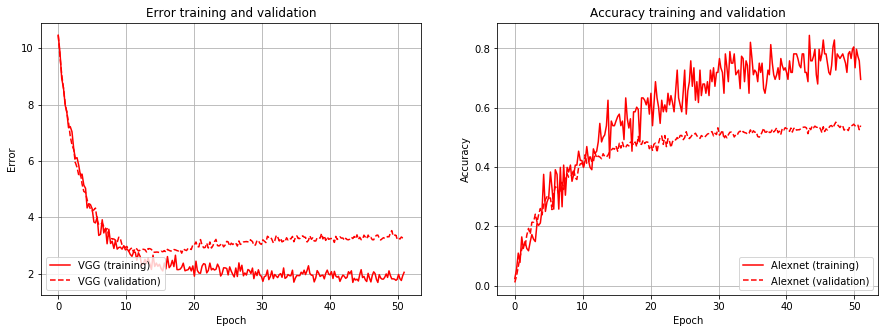

In [26]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'r-', label='VGG (training)')
plt.plot(plot_data[0], plot_data[3], 'r--', label='VGG (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'r-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[4], 'r--', label='Alexnet (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

#plt.savefig('activation_functions.pdf', bbox_inches='tight')
plt.show()